# Predicting Loan Approval Model

## Random Forest Project


This dataset is picked from https://www.kaggle.com/ninzaami/loan-predication/home .

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#get data
df=pd.read_csv("loan_approv.csv")

In [3]:
#check the head
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


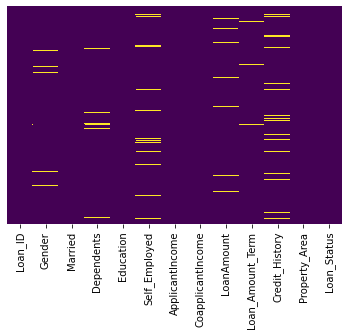

In [6]:
#checking for null values using heatmap
sns.heatmap(df.isnull(),cmap="viridis",cbar=False,yticklabels=False)

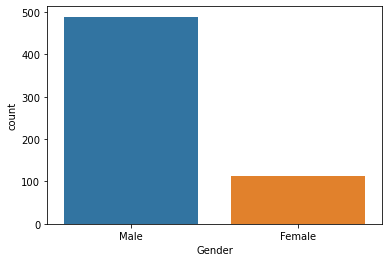

In [7]:
sns.countplot("Gender",data=df)

In [8]:
data=df.copy(deep=True)

In [9]:
data["Gender"].fillna("Male",inplace=True)

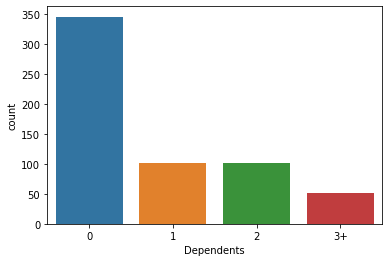

In [10]:
sns.countplot("Dependents",data=df)

In [11]:
data['Dependents'].fillna(data['Dependents'].value_counts().idxmax(), inplace=True)

In [12]:
data['Self_Employed'].fillna(data['Self_Employed'].value_counts().idxmax(), inplace=True)

In [13]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)

In [14]:
data['Credit_History'].fillna(data['Credit_History'].value_counts().idxmax(), inplace=True)

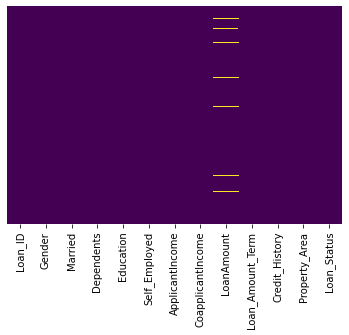

In [15]:
#checking for null values using heatmap
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [16]:
#We cant guess the loan amount so we should drop this 
data.dropna(inplace=True)

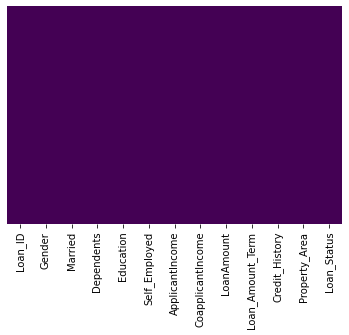

In [17]:
#checking for null values using heatmap
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [18]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [19]:
df_add=pd.get_dummies(data.drop(["Loan_ID","Loan_Status"],axis=1),drop_first=True)
df_add.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df_add

In [22]:
y=data["Loan_Status"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)

In [26]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10)

In [27]:
prediction = rfc.predict(x_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           N       0.93      0.44      0.60        61
           Y       0.77      0.98      0.86       116

    accuracy                           0.80       177
   macro avg       0.85      0.71      0.73       177
weighted avg       0.83      0.80      0.77       177

